In [36]:
# import libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [37]:
# PART A: function to calculate lbp codes
def ICV_LBP(img, window_height, window_width):
    # define image height and width
    img_height, img_width = img.shape

    # define list for image windows and descriptors of each window
    windows = []
    descriptors = []

    # check window height and width
    if img_height % window_height != 0 or img_width % window_width != 0:
        raise ValueError("Window size must divide the image dimensions exactly.")

    # divide image into windows
    for i in range(0, img_height, window_height):
        for j in range(0, img_width, window_width):
            window = img[i:i + window_height, j:j + window_width]
            windows.append(window)

    # loop through windows
    for window in windows:
        # list to store lbp codes
        codes = []
        # x in range 1 to win-1 excludes edge pixels
        for i in range(1, window_height - 1):
            for j in range(1, window_width - 1):
                # define center
                center = window[i, j]
                # calculate lbp codes
                binary_code = 0
                binary_code |= (window[i-1, j-1] >= center) << 7
                binary_code |= (window[i-1, j] >= center) << 6
                binary_code |= (window[i-1, j+1] >= center) << 5
                binary_code |= (window[i, j+1] >= center) << 4
                binary_code |= (window[i+1, j+1] >= center) << 3
                binary_code |= (window[i+1, j] >= center) << 2
                binary_code |= (window[i+1, j-1] >= center) << 1
                binary_code |= (window[i, j-1] >= center)
                codes.append(binary_code)


        # compute histogram
        hist, _ = np.histogram(codes, bins=256, range=(0, 256))

        # normalize histogram
        hist = hist.astype("float")
        hist /= hist.sum()

        # add histogram to list
        descriptors.append((window, codes, hist))

    return descriptors

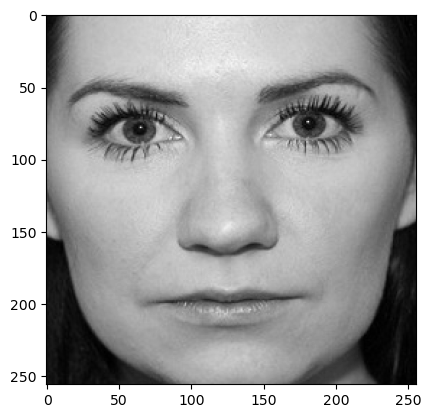

In [38]:
# load image
img = cv2.imread("face-2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [39]:
# define height and width of image
height, width = img.shape

In [40]:
# define window height and width
window_height, window_width = height // 4, width // 4
descriptors = ICV_LBP(img, window_height, window_width)

In [41]:
import random
# show output for 3 non-consecutive windows
random_windows = [random.randint(0, len(descriptors)-1) for _ in range(3)]
i = random_windows[0]
j = random_windows[1]
k = random_windows[2]

Window 14


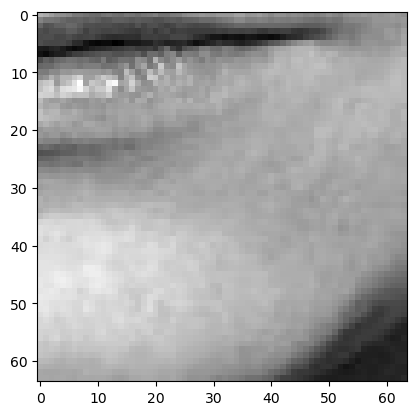

In [42]:
print('Window', i)
plt.imshow(descriptors[i][0], cmap='gray')

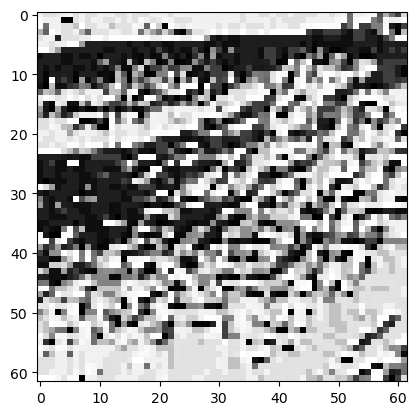

In [43]:
lbp_code1 = np.array(descriptors[i][1]).reshape(window_height-2, window_width-2)
plt.imshow(lbp_code1, cmap='gray')

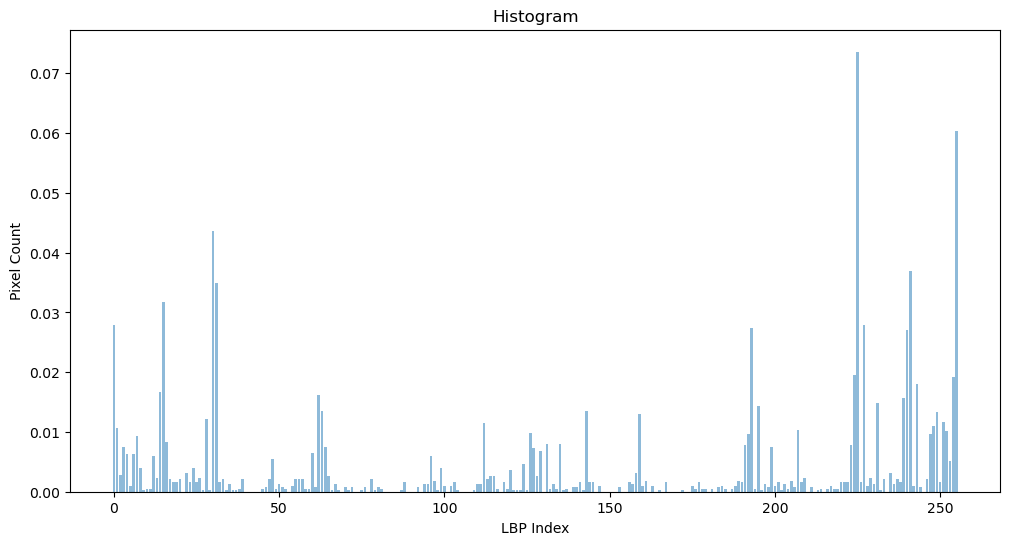

In [44]:
intensity_values = np.arange(256)
plt.figure(figsize=(12, 6))
plt.bar(intensity_values, descriptors[i][2], alpha=0.5)
plt.title("Histogram")
plt.xlabel("LBP Index")
plt.ylabel("Pixel Count")
plt.show()

Window 7


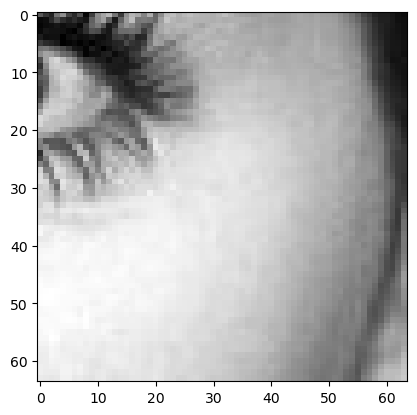

In [45]:
print('Window', j)
plt.imshow(descriptors[j][0], cmap='gray')

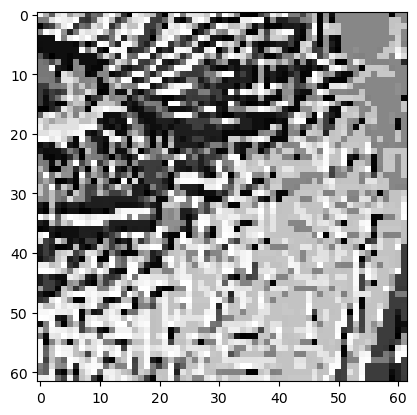

In [46]:
lbp_code2 = np.array(descriptors[j][1]).reshape(window_height-2, window_width-2)
plt.imshow(lbp_code2, cmap='gray')

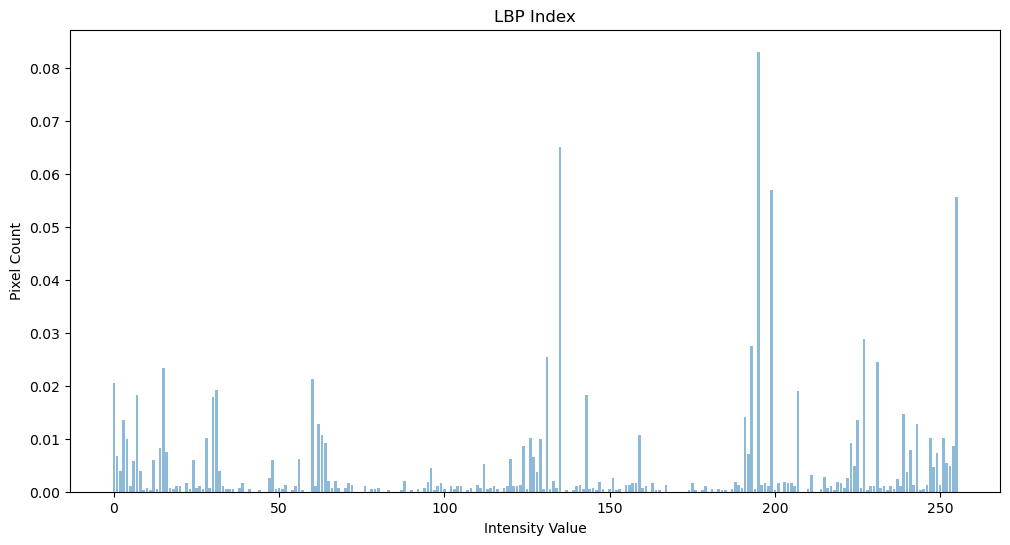

In [47]:
intensity_values = np.arange(256)
plt.figure(figsize=(12, 6))
plt.bar(intensity_values, descriptors[j][2], alpha=0.5)
plt.title("LBP Index")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.show()

Window 11


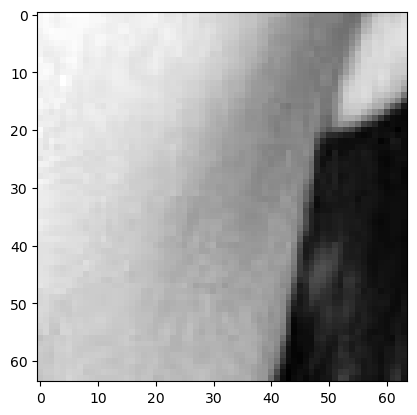

In [48]:
print('Window', k)
plt.imshow(descriptors[k][0], cmap='gray')

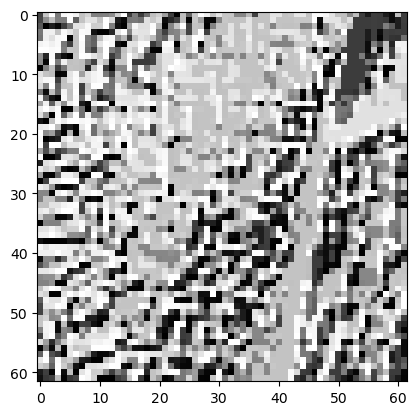

In [49]:
lbp_code3 = np.array(descriptors[k][1]).reshape(window_height-2, window_width-2)
plt.imshow(lbp_code3, cmap='gray')

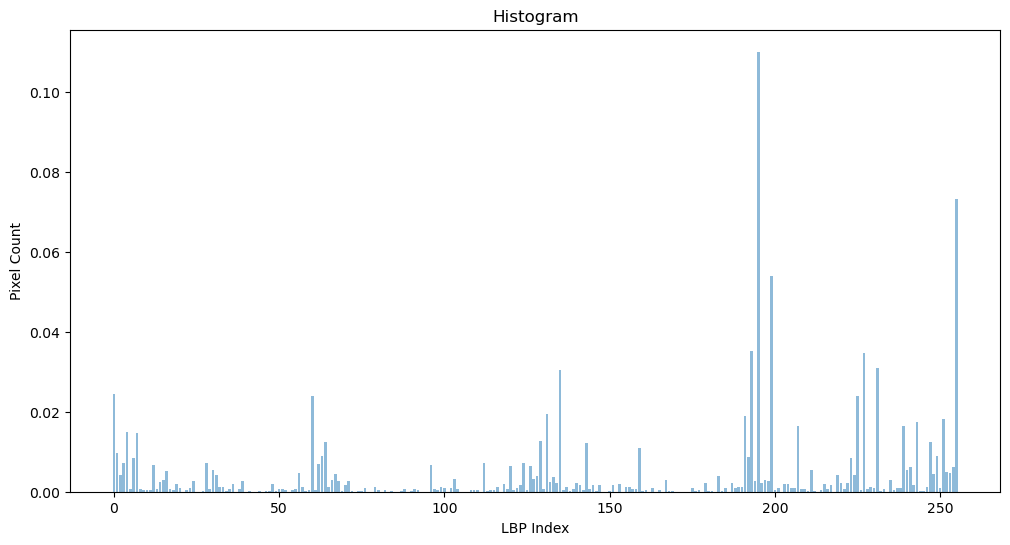

In [50]:
intensity_values = np.arange(256)
plt.figure(figsize=(12, 6))
plt.bar(intensity_values, descriptors[k][2], alpha=0.5)
plt.title("Histogram")
plt.xlabel("LBP Index")
plt.ylabel("Pixel Count")
plt.show()

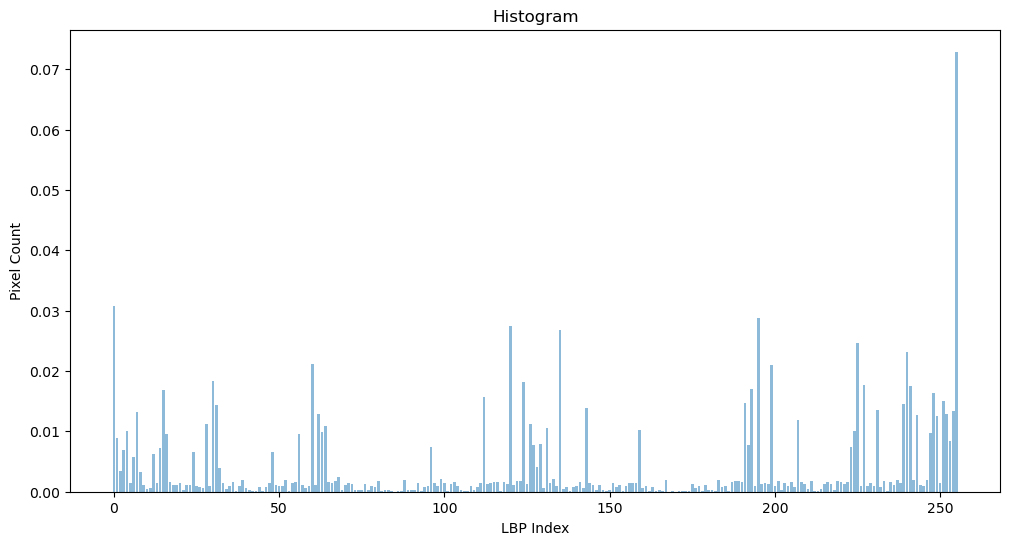

In [51]:
# PART B: descriptor for entire image
histograms = []
for i in range(len(descriptors)):
    histograms.append(descriptors[i][2])

global_histogram = np.sum(histograms, axis=0)
global_histogram /= global_histogram.sum()

intensity_values = np.arange(256)
plt.figure(figsize=(12, 6))
plt.bar(intensity_values, global_histogram, alpha=0.5)
plt.title("Histogram")
plt.xlabel("LBP Index")
plt.ylabel("Pixel Count")
plt.show()

In [52]:
# function to calculate the distance of two histograms
def ICV_HIST_DISTANCE(hist1, hist2):
    return math.sqrt(sum((h1 - h2) ** 2 for h1, h2 in zip(hist1, hist2)))

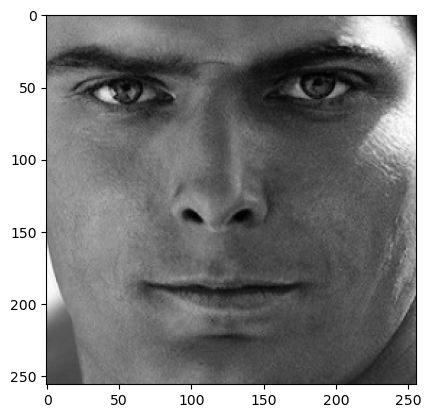

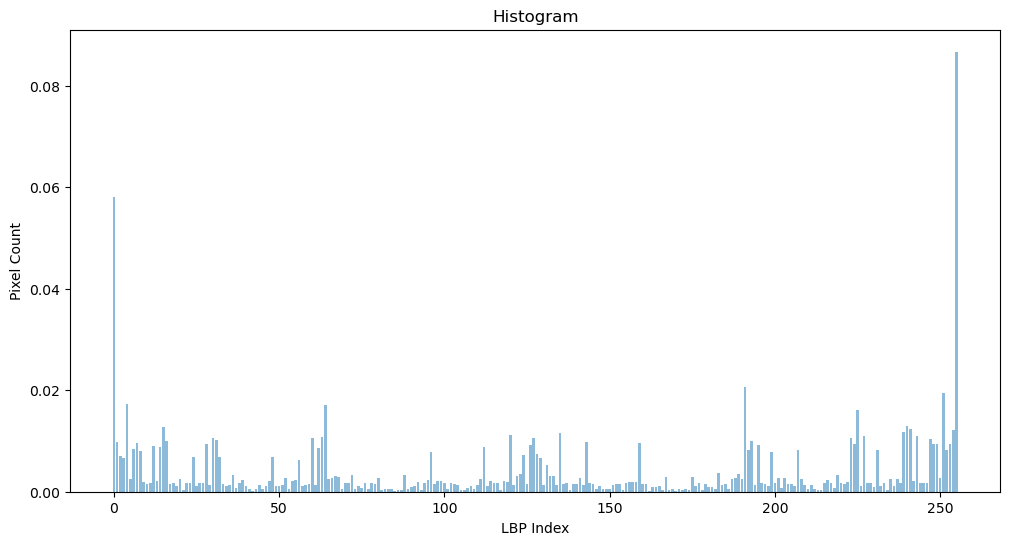

In [53]:
# load face image
face_img = cv2.imread("face-1.jpg")
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
plt.imshow(face_img, cmap='gray')

# define height and width of image
face_height, face_width = face_img.shape

# define window height and width
face_window_height, face_window_width = face_height // 4, face_width // 4
face_descriptors = ICV_LBP(face_img, face_window_height, face_window_width)

# descriptor for entire face image
face_histograms = []
for i in range(len(face_descriptors)):
    face_histograms.append(face_descriptors[i][2])

global_face_histogram = np.sum(face_histograms, axis=0)
global_face_histogram /= global_face_histogram.sum()

intensity_values = np.arange(256)
plt.figure(figsize=(12, 6))
plt.bar(intensity_values, global_face_histogram, alpha=0.5)
plt.title("Histogram")
plt.xlabel("LBP Index")
plt.ylabel("Pixel Count")
plt.show()

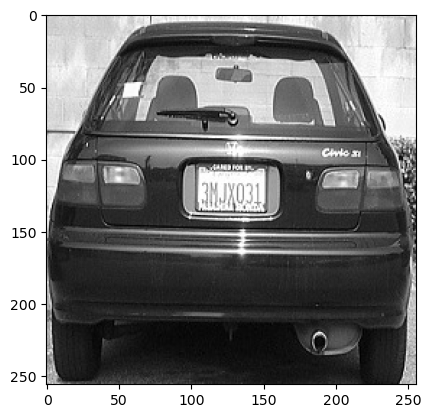

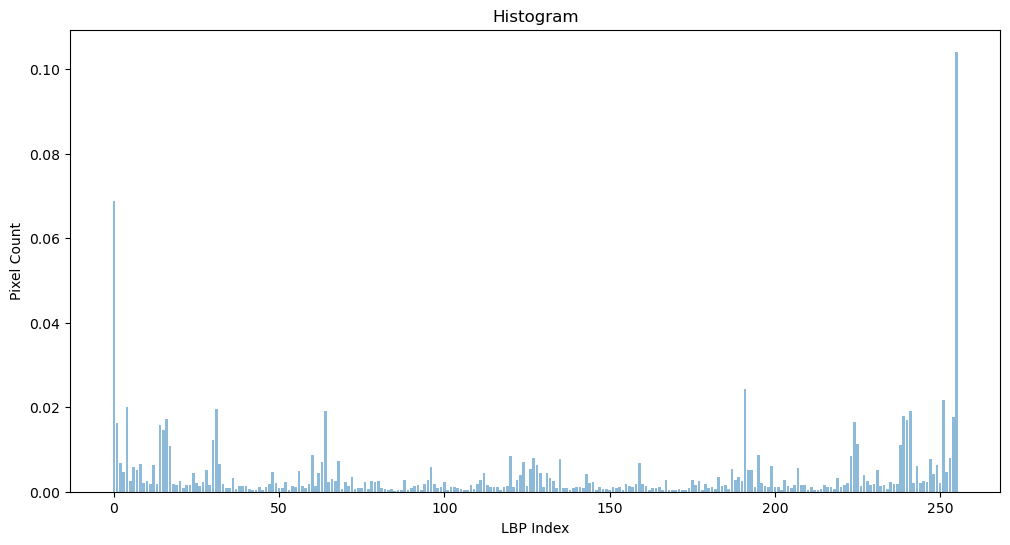

In [54]:
# load non-face image
nonface_img = cv2.imread("car-3.jpg")
nonface_img = cv2.cvtColor(nonface_img, cv2.COLOR_BGR2GRAY)
plt.imshow(nonface_img, cmap='gray')

# define height and width of image
nonface_height, nonface_width = nonface_img.shape

# define window height and width
nonface_window_height, nonface_window_width = nonface_height // 4, nonface_width // 4
nonface_descriptors = ICV_LBP(nonface_img, nonface_window_height, nonface_window_width)

# descriptor for entire face image
nonface_histograms = []
for i in range(len(nonface_descriptors)):
    nonface_histograms.append(nonface_descriptors[i][2])

global_nonface_histogram = np.sum(nonface_histograms, axis=0)
global_nonface_histogram /= global_nonface_histogram.sum()

intensity_values = np.arange(256)
plt.figure(figsize=(12, 6))
plt.bar(intensity_values, global_nonface_histogram, alpha=0.5)
plt.title("Histogram")
plt.xlabel("LBP Index")
plt.ylabel("Pixel Count")
plt.show()

In [55]:
# return histogram distances
face_dist = ICV_HIST_DISTANCE(global_histogram, global_face_histogram)
nonface_dist = ICV_HIST_DISTANCE(global_histogram, global_nonface_histogram)
print('Distance with face histogram:', face_dist)
print('Distance with non-face histogram:', nonface_dist)

Distance with face histogram: 0.056749438476702996
Distance with non-face histogram: 0.08094675119337366


In [56]:
# classify input image
if face_dist < nonface_dist:
    print('Class: Face Image')
else:
    print('Class: non-Face Image')

Class: Face Image


In [73]:
# PART C: decrease window size
smaller_window_height, smaller_window_width = height // 8, width // 8
smaller_descriptors = ICV_LBP(img, smaller_window_height, smaller_window_width)

In [74]:
# create global histogram
smaller_histograms = []
for i in range(len(smaller_descriptors)):
    smaller_histograms.append(smaller_descriptors[i][2])

smaller_global_histogram = np.sum(smaller_histograms, axis=0)
smaller_global_histogram /= smaller_global_histogram.sum()

In [75]:
# reference face image
smaller_face_window_height, smaller_face_window_width = face_height // 16, face_width // 16
smaller_face_descriptors = ICV_LBP(face_img, smaller_face_window_height, smaller_face_window_width)

In [76]:
# create global face histogram
smaller_face_histograms = []
for i in range(len(smaller_face_descriptors)):
    smaller_face_histograms.append(smaller_face_descriptors[i][2])

smaller_global_face_histogram = np.sum(smaller_face_histograms, axis=0)
smaller_global_face_histogram /= smaller_global_face_histogram.sum()

In [77]:
# reference non-face image
smaller_nonface_window_height, smaller_nonface_window_width = nonface_height // 16, nonface_width // 16
smaller_nonface_descriptors = ICV_LBP(nonface_img, smaller_nonface_window_height, smaller_nonface_window_width)

In [78]:
# create global non-face histogram
smaller_nonface_histograms = []
for i in range(len(smaller_nonface_descriptors)):
    smaller_nonface_histograms.append(smaller_nonface_descriptors[i][2])

smaller_global_nonface_histogram = np.sum(smaller_nonface_histograms, axis=0)
smaller_global_nonface_histogram /= smaller_global_nonface_histogram.sum()

In [79]:
# return histogram distances
smaller_face_dist = ICV_HIST_DISTANCE(smaller_global_histogram, smaller_global_face_histogram)
smaller_nonface_dist = ICV_HIST_DISTANCE(smaller_global_histogram, smaller_global_nonface_histogram)
print('Distance with face histogram:', smaller_face_dist)
print('Distance with non-face histogram:', smaller_nonface_dist)

Distance with face histogram: 0.05816346026659889
Distance with non-face histogram: 0.0811378491584368


In [80]:
# classify input image
if smaller_face_dist < smaller_nonface_dist:
    print('Class: Face Image')
else:
    print('Class: non-Face Image')

Class: Face Image


In [81]:
# PART D: increase window size
bigger_window_height, bigger_window_width = height // 2, width // 2
bigger_descriptors = ICV_LBP(img, bigger_window_height, bigger_window_width)

In [82]:
# create global histogram
bigger_histograms = []
for i in range(len(bigger_descriptors)):
    bigger_histograms.append(bigger_descriptors[i][2])

bigger_global_histogram = np.sum(bigger_histograms, axis=0)
bigger_global_histogram /= bigger_global_histogram.sum()

In [83]:
# reference face image
bigger_face_window_height, bigger_face_window_width = face_height // 2, face_width // 2
bigger_face_descriptors = ICV_LBP(face_img, bigger_face_window_height, bigger_face_window_width)

In [84]:
# create global face histogram
bigger_face_histograms = []
for i in range(len(bigger_face_descriptors)):
    bigger_face_histograms.append(bigger_face_descriptors[i][2])

bigger_global_face_histogram = np.sum(bigger_face_histograms, axis=0)
bigger_global_face_histogram /= bigger_global_face_histogram.sum()

In [85]:
# reference non-face image
bigger_nonface_window_height, bigger_nonface_window_width = nonface_height // 16, nonface_width // 16
bigger_nonface_descriptors = ICV_LBP(nonface_img, bigger_nonface_window_height, bigger_nonface_window_width)

In [86]:
# create global non-face histogram
bigger_nonface_histograms = []
for i in range(len(bigger_nonface_descriptors)):
    bigger_nonface_histograms.append(bigger_nonface_descriptors[i][2])

bigger_global_nonface_histogram = np.sum(bigger_nonface_histograms, axis=0)
bigger_global_nonface_histogram /= bigger_global_nonface_histogram.sum()

In [87]:
# return histogram distances
bigger_face_dist = ICV_HIST_DISTANCE(bigger_global_histogram, bigger_global_face_histogram)
bigger_nonface_dist = ICV_HIST_DISTANCE(bigger_global_histogram, bigger_global_nonface_histogram)
print('Distance with face histogram:', bigger_face_dist)
print('Distance with non-face histogram:', bigger_nonface_dist)

Distance with face histogram: 0.056228848301402116
Distance with non-face histogram: 0.07872033714094438


In [88]:
# classify input image
if bigger_face_dist < bigger_nonface_dist:
    print('Class: Face Image')
else:
    print('Class: non-Face Image')

Class: Face Image
